# CRISMIS Project

#### Dependencies :

In [1]:
import os
import glob
import time
import shutil
import rasterio
import requests
import lacosmic
import cv2
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from tqdm import tqdm
from rasterio.plot import show
from bs4 import BeautifulSoup as bs

Some Fixed Variable used : base_dir, base_url

**base_dir** can be set accordinngly by the user

In [2]:
base_dir = "/Users/Yash/Dev/CRISMIS GSoC Project/try"
base_url = "https://pdsimage2.wr.usgs.gov/archive/mess-e_v_h-mdis-2-edr-rawdata-v1.0/MSGRMDS_1001/DATA/"

In [3]:
def initialize():
    '''
    Starts the program by making all the required directories
    '''
    try:
        os.chdir(base_dir)
        #print(os.getcwd())
    except:
        print("Error in changing directory")
        
    data_dir = os.path.join(base_dir, 'retrieved_data')
    
    if not os.path.exists(data_dir):
        try:
            os.mkdir(data_dir)
            print("\"retrieved_data\" Directory initialized")
        except:
            pass
    else:
        print("Directory \"retrieved_data\" already present !")
        
    dataset = os.path.join(base_dir, 'dataset')
    
    if not os.path.exists(dataset):
        try:
            os.mkdir(dataset)
            print("\"Dataset\" Directory initialized")
        except:
            pass
    else:
        print("Directory \"Dataset\" already present !")
        
    train_dir = os.path.join(dataset, 'train')
    val_dir = os.path.join(dataset, 'validate')
    
    if not os.path.exists(train_dir):
        try:
            os.mkdir(train_dir)
            print("\"Train\" Directory initialized")
        except:
            pass
    else:
        print("Directory \"Train\" already present !")
    
    if not os.path.exists(val_dir):
        try:
            os.mkdir(val_dir)
            print("\"Validate\" Directory initialized")
        except:
            pass
    else:
        print("Directory \"Validate\" already present !")
            
    train_present = os.path.join(train_dir, 'train_present')
    val_present = os.path.join(val_dir, 'val_present')
    train_absent = os.path.join(train_dir, 'train_absent')
    val_absent = os.path.join(val_dir, 'val_absent')
    
    if not os.path.exists(train_present):
        try:
            os.mkdir(train_present)
            print("\"train_present\" Directory initialized")
        except:
            pass
    else:
        print("Directory \"train_present\" already present !")
        
    if not os.path.exists(val_present):
        try:
            os.mkdir(val_present)
            print("\"val_present\" Directory initialized")
        except:
            pass
    else:
        print("Directory \"val_present\" already present !")
    
    if not os.path.exists(train_absent):
        try:
            os.mkdir(train_absent)
            print("\"train_absent\" Directory initialized")
        except:
            pass
    else:
        print("Directory \"train_absent\" already present !")
        
    if not os.path.exists(val_absent):
        try:
            os.mkdir(val_absent)
            print("\"val_absent\" Directory initialized")
        except:
            pass
    else:
        print("Directory \"val_absent\" already present !")
    
    '''try:
        os.chdir(data_dir)
        #print(os.getcwd())
    except:
        print("Error in changing directory")'''

## Step 1 – Retrieving and Plotting Image Files

In [4]:
def downloader(url, path):
    '''
    Downloads the images from the given "url" to the required "path"
    
    Arguments:
    
    url   -- the url to the file to download
    path  -- full path to where to save the file
        
    '''
    try:
        response = requests.get(url)
    except:
        time.sleep(2)
        response = requests.get(url)
    
    if response:
        open(path, 'wb').write(response.content)

In [ ]:
def retriever(doy, *varg):  
    '''
    Creates the directory for a given "doy" and sends the link for the image to the "downloader" function
    
    Arguments:
    
    doy    -- the day of the year
    *varg  -- if names of the images are provided, then only those will be downloaded, to the corresponding "doy"
              (optional variable argument)
              if not provided, then all the images of the particular "doy" will be downloaded
    '''
    day_url = base_url + doy
    response = requests.get(day_url)
    data = response.text
    soup =  bs(data, 'html.parser')

    #cwd = os.getcwd()
    #print(cwd)
    work_dir = os.path.join(base_dir, 'retrieved_data', doy)
    #print(work_dir)
    
    if not os.path.exists(work_dir):
        try:
            os.mkdir(work_dir)
            print("Work Directory initialized")
        except:
            print("Directory \"" + doy + "\" already present !")  
            
    try:
        os.chdir(work_dir)
        #cwd = os.getcwd()
        #print(cwd)
    except:
        print("Error in changing directory")
    
    if not varg:
        for href in tqdm(soup.find_all('a'), "Retrieving Data"):
            link = href.get('href')
            if(link[0] not in ('?','/')):
                req_url = day_url + link
                print(link)
                #print(req_url)
                path = work_dir + link
                downloader(req_url, path)
    else:
        for arg in varg:
            req_url = day_url + arg
            print(arg)
            #print(req_url)
            path = work_dir + arg
            downloader(req_url, path)
                
    os.chdir('../')
    #cwd = os.getcwd()
    #print(cwd)

In [5]:
def retrieve_all():
    '''
    Only has to be run once, and it will scrape the "base_url" for all the directories and download all images
    '''
    response = requests.get(base_url)
    data = response.text
    soup =  bs(data, 'html.parser')
    
    for href in tqdm(soup.find_all('a'), "Getting Links"):
        link = href.get('href')
        if(link[0] not in ('?','/')):
            print(link)
            retriever(link)

In [6]:
print(os.getcwd())
initialize()

/Users/Yash/Dev/CRISMIS GSoC Project
Directory "retrieved_data" already present !
Directory "Dataset" already present !
Directory "Train" already present !
Directory "Validate" already present !
Directory "train_present" already present !
Directory "val_present" already present !
Directory "train_absent" already present !
Directory "val_absent" already present !


Hard coding the date and image name for the required images. This can be taken as input in the final implementation.

In [7]:
year = 2011
day = 207
img1 = 'EW0220137668G.IMG'
doy = str(year) + "_" + str(day) + "/"
#retriever(doy, img1)

Using the recursive **glob** function to search the downloaded data for target image

In [8]:
files = [f for f in glob.glob(base_dir + "/retrieved_data/**/*.IMG", recursive=True)]
for f in files:
    if f.find(img1) != -1:
        target = f
        break
target

'/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data/2011_207/EW0220137668G.IMG'

Using **rasterio** to plot satellite imagery

/Users/Yash/opt/anaconda3/envs/ml/lib/python3.7/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


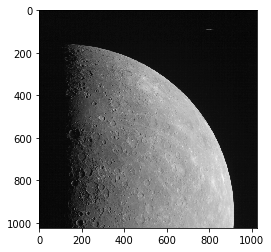

In [9]:
dataset = rasterio.open(target)
show(dataset, cmap='gray')

In [10]:
year = 2014
day = 215
img2 = 'EN1049375684M.IMG'
doy = str(year) + "_" + str(day) + "/"
retriever(doy, img2)

In [11]:
files = [f for f in glob.glob(base_dir + "/retrieved_data/**/*.IMG", recursive=True)]
for f in files:
    if f.find(img2) != -1:
        target = f
        break
target

'/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data/2014_215/EN1049375684M.IMG'

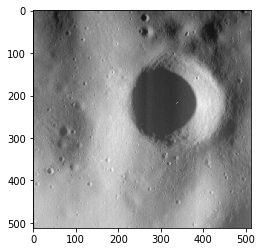

In [12]:
dataset = rasterio.open(target)
show(dataset, cmap='gray')

## Step 2 – Dataset Preparation

Taking some sample dates for dataset preparation

In [13]:
year = 2011
day = 207
doy = str(year) + "_" + str(day) + "/"
retriever(doy)

In [14]:
year = 2014
day = 215
doy = str(year) + "_" + str(day) + "/"
retriever(doy)

In [15]:
year = 2011
day = 155
doy = str(year) + "_" + str(day) + "/"
retriever(doy)

In [16]:
year = 2011
day = 156
doy = str(year) + "_" + str(day) + "/"
retriever(doy)

In [17]:
year = 2011
day = 157
img = "EW0215844301G.IMG"
doy = str(year) + "_" + str(day) + "/"
retriever(doy, img)

Here we take use of the **lacosmic** library to identify whether the image has any cosmic ray artifact present in it or not

In [18]:
def identify_CRA(file, instance=1):
    '''
    Identifies the cosmic ray artifacts for the provided file
    
    Arguments:
    
    file      -- path of the target image
    instance  -- enumerated variable, to maintain count of processed images
                 (default=1)
    '''
    data = rasterio.open(file)
    #show(data, cmap='gray')
    img = data.read()
    img = img * 1.0
    print(instance)
    if(img.shape==4):
        img_arr = np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2]*img.shape[3]))
    else:
        img_arr = np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2]))
    cleanarr, crmask = lacosmic.lacosmic(img_arr, contrast=5.0, cr_threshold=4.5, neighbor_threshold=0.3, 
                                         error=None, mask=None, background=None, effective_gain=1.0, 
                                         readnoise=6.5, maxiter=4, border_mode=u'mirror')
    return img_arr, cleanarr, crmask

def search(arr, val=True):
    '''
    Search the "crmask" array for "True" values
    
    Arguments:
    
    arr   -- crmask array returned by the lacosmic instance
    val   -- True (fixed argument)
    '''
    for row in arr:
        for element in row:
            if element == val:
                return True
    return False

In the below function instead of saving them as **.png** file we can work on **.IMG** too, in that case instead of saving we will use **shutil** library to move the files

In [19]:
def make_dataset(files):
    '''
    Preparing the dataset by saving the downloaded images to the "train_present" and "train_absent" directories as ".png" files 
    after identification of Cosmic Ray artifacts
    
    Arguments:
    
    files  -- list of all images in the downloaded data
    '''
    
    present = []
    absent = []

    dataset = os.path.join(base_dir, 'dataset')
    
    train_dir = os.path.join(dataset, 'train')
    val_dir = os.path.join(dataset, 'validate')
    
    train_present = os.path.join(train_dir, 'train_present')
    val_present = os.path.join(val_dir, 'val_present')
    train_absent = os.path.join(train_dir, 'train_absent')
    val_absent = os.path.join(val_dir, 'val_absent')

    for i, f in enumerate(files):
        img_arr, cleanarr, crmask = identify_CRA(f, i)
        boolean = search(crmask)
        if boolean:
            destination = os.path.join(train_present, f[f.rfind('/')+1:f.rfind('.')])
            try:
                plt.imsave(destination+".png", img_arr, cmap='gray')
                #shutil.copy(f, destination)
            except Exception as e:
                print(e)
            present.append(destination+".png")
        else:
            destination = os.path.join(train_absent, f[f.rfind('/')+1:f.rfind('.')])
            try:
                plt.imsave(destination+".png", img_arr, cmap='gray')
                #shutil.copy(f, destination)
            except Exception as e:
                print(e)   
            absent.append(destination+".png")
                
    return present, absent

In [20]:
def arrange_files(present, absent):
    '''
    To complete the process of making the dataset, some fraction(25%) of files are moved from train to validation set
    
    Arguments:
    
    present  -- list of images having CR Artifacts
    absent   -- list of images NOT having CR Artifacts
    '''
    present_len = len(present)
    absent_len = len(absent)
    
    dataset = os.path.join(base_dir, 'dataset')
    
    train_dir = os.path.join(dataset, 'train')
    val_dir = os.path.join(dataset, 'validate')
    
    train_present = os.path.join(train_dir, 'train_present')
    val_present = os.path.join(val_dir, 'val_present')
    train_absent = os.path.join(train_dir, 'train_absent')
    val_absent = os.path.join(val_dir, 'val_absent')
    
    val_present_size = int(0.25 * present_len)
    val_absent_size = int(0.25 * absent_len)
    
    for i, f in enumerate(present):
        name = f[f.rfind('/'):]
        if(i < val_present_size):
            os.rename(f, val_present+name)
        
    for i, f in enumerate(absent):
        name = f[f.rfind('/'):]
        if(i < val_absent_size):
            os.rename(f, val_absent+name)

Testing for downloaded images

In [21]:
files = [f for f in glob.glob(base_dir + "/retrieved_data/**/*.IMG", recursive=True)]

print(len(files))

present, absent = make_dataset(files)

558
0
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]


/Users/Yash/opt/anaconda3/envs/ml/lib/python3.7/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


1
INFO: Iteration 1: Found 124 cosmic-ray pixels, Total: 124 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 124 [lacosmic.lacosmic]
2
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
3
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
4
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
5
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
6
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
7
INFO: Iteration 1: Found 3 cosmic-ray pixels, Total: 3 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 3 [lacosmic.lacosmic]
8
INFO: Iteration 1: Found 1 cosmic-ray pixels, Total: 1 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 1 [lacosmic.lacosmic]
9
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
10
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic

85
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
86
INFO: Iteration 1: Found 14 cosmic-ray pixels, Total: 14 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 14 [lacosmic.lacosmic]
87
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
88
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
89
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
90
INFO: Iteration 1: Found 2 cosmic-ray pixels, Total: 2 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 2 [lacosmic.lacosmic]
91
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
92
INFO: Iteration 1: Found 3 cosmic-ray pixels, Total: 3 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 3 [lacosmic.lacosmic]
93
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
94
INFO: Iteration 1: Found 7 cosmic-ray pixels, Total: 7 [lacosmic.la

164
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
165
INFO: Iteration 1: Found 4 cosmic-ray pixels, Total: 4 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 4 [lacosmic.lacosmic]
166
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
167
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
168
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
169
INFO: Iteration 1: Found 1 cosmic-ray pixels, Total: 1 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 1 [lacosmic.lacosmic]
170
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
171
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
172
INFO: Iteration 1: Found 194 cosmic-ray pixels, Total: 194 [lacosmic.lacosmic]
INFO: Iteration 2: Found 11 cosmic-ray pixels, Total: 205 [lacosmic.lacosmic]
INFO: Iteration 3: Found 0 cosmic-ray pixels, Total: 205 

INFO: Iteration 2: Found 94 cosmic-ray pixels, Total: 1100 [lacosmic.lacosmic]
INFO: Iteration 3: Found 6 cosmic-ray pixels, Total: 1106 [lacosmic.lacosmic]
INFO: Iteration 4: Found 0 cosmic-ray pixels, Total: 1106 [lacosmic.lacosmic]
236
INFO: Iteration 1: Found 1295 cosmic-ray pixels, Total: 1295 [lacosmic.lacosmic]
INFO: Iteration 2: Found 95 cosmic-ray pixels, Total: 1390 [lacosmic.lacosmic]
INFO: Iteration 3: Found 7 cosmic-ray pixels, Total: 1397 [lacosmic.lacosmic]
INFO: Iteration 4: Found 0 cosmic-ray pixels, Total: 1397 [lacosmic.lacosmic]
237
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
238
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
239
INFO: Iteration 1: Found 1 cosmic-ray pixels, Total: 1 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 1 [lacosmic.lacosmic]
240
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
241
INFO: Iteration 1: Found 0 cosmic-ray pixels, Tota

312
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
313
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
314
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
315
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
316
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
317
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
318
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
319
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
320
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
321
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
322
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
323
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
324
INFO: Iteration 1: Found 0 cosmic-ray pixels, To

415
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
416
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
417
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
418
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
419
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
420
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
421
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
422
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
423
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
424
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
425
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
426
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
427
INFO: Iteration 1: Found 0 cosmic-ray pixels, To

INFO: Iteration 2: Found 33 cosmic-ray pixels, Total: 1729 [lacosmic.lacosmic]
INFO: Iteration 3: Found 9 cosmic-ray pixels, Total: 1738 [lacosmic.lacosmic]
INFO: Iteration 4: Found 0 cosmic-ray pixels, Total: 1738 [lacosmic.lacosmic]
497
INFO: Iteration 1: Found 815 cosmic-ray pixels, Total: 815 [lacosmic.lacosmic]
INFO: Iteration 2: Found 4 cosmic-ray pixels, Total: 819 [lacosmic.lacosmic]
INFO: Iteration 3: Found 0 cosmic-ray pixels, Total: 819 [lacosmic.lacosmic]
498
INFO: Iteration 1: Found 642 cosmic-ray pixels, Total: 642 [lacosmic.lacosmic]
INFO: Iteration 2: Found 4 cosmic-ray pixels, Total: 646 [lacosmic.lacosmic]
INFO: Iteration 3: Found 0 cosmic-ray pixels, Total: 646 [lacosmic.lacosmic]
499
INFO: Iteration 1: Found 117 cosmic-ray pixels, Total: 117 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 117 [lacosmic.lacosmic]
500
INFO: Iteration 1: Found 168 cosmic-ray pixels, Total: 168 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, To

INFO: Iteration 3: Found 3 cosmic-ray pixels, Total: 944 [lacosmic.lacosmic]
INFO: Iteration 4: Found 3 cosmic-ray pixels, Total: 947 [lacosmic.lacosmic]
533
INFO: Iteration 1: Found 88 cosmic-ray pixels, Total: 88 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 88 [lacosmic.lacosmic]
534
INFO: Iteration 1: Found 640 cosmic-ray pixels, Total: 640 [lacosmic.lacosmic]
INFO: Iteration 2: Found 13 cosmic-ray pixels, Total: 653 [lacosmic.lacosmic]
INFO: Iteration 3: Found 0 cosmic-ray pixels, Total: 653 [lacosmic.lacosmic]
535
INFO: Iteration 1: Found 363 cosmic-ray pixels, Total: 363 [lacosmic.lacosmic]
INFO: Iteration 2: Found 9 cosmic-ray pixels, Total: 372 [lacosmic.lacosmic]
INFO: Iteration 3: Found 9 cosmic-ray pixels, Total: 381 [lacosmic.lacosmic]
INFO: Iteration 4: Found 8 cosmic-ray pixels, Total: 389 [lacosmic.lacosmic]
536
INFO: Iteration 1: Found 737 cosmic-ray pixels, Total: 737 [lacosmic.lacosmic]
INFO: Iteration 2: Found 4 cosmic-ray pixels, Total: 7

In [22]:
print(len(present))
print(len(absent))
arrange_files(present, absent)

157
401


Plotting 10 images of both **present** and **absent** directories for verification purposes

In [23]:
dataset = os.path.join(base_dir, 'dataset')
    
train_dir = os.path.join(dataset, 'train')
val_dir = os.path.join(dataset, 'validate')
    
train_present = os.path.join(train_dir, 'train_present')
val_present = os.path.join(val_dir, 'val_present')
train_absent = os.path.join(train_dir, 'train_absent')
val_absent = os.path.join(val_dir, 'val_absent')

Images having Cosmic Ray Artifacts


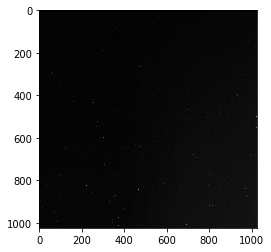

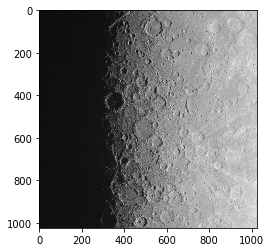

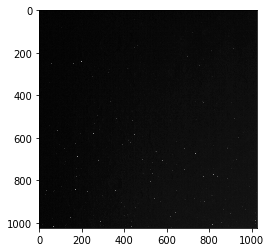

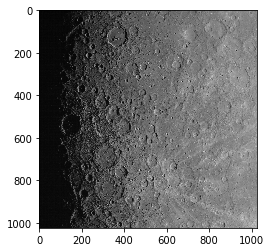

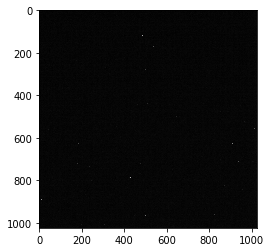

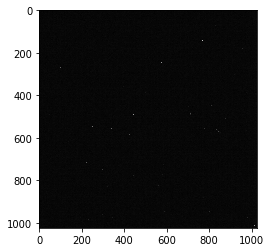

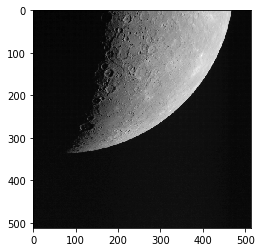

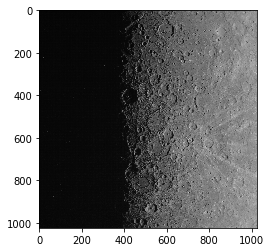

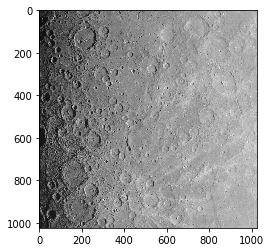

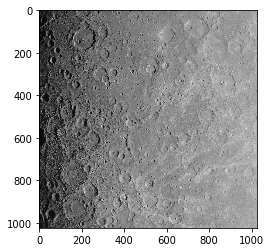

Images NOT having Cosmic Ray Artifacts


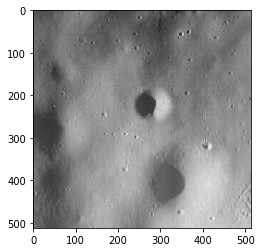

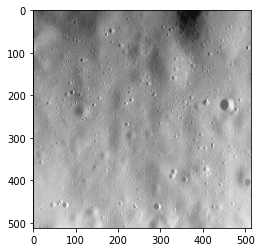

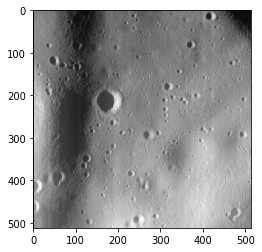

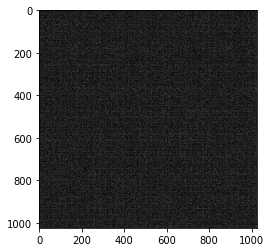

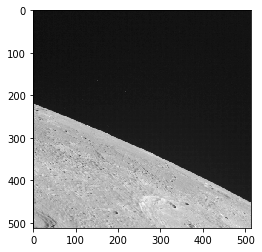

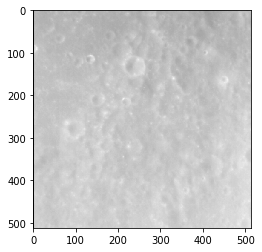

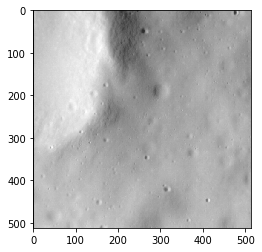

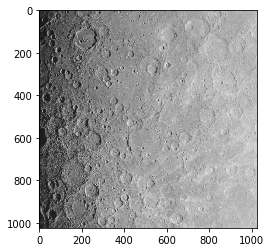

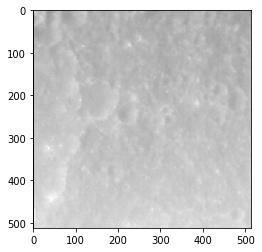

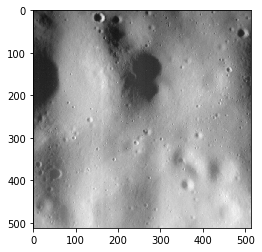

In [24]:
print("Images having Cosmic Ray Artifacts")

tp = [f for f in glob.glob(train_present + "/*.png", recursive=True)]

for f in tp[:10]:
    data = rasterio.open(f)
    show(data, cmap='gray')
    
print("Images NOT having Cosmic Ray Artifacts")

ta = [f for f in glob.glob(train_absent + "/*.png", recursive=True)]

for f in ta[:10]:
    data = rasterio.open(f)
    show(data, cmap='gray')

Function to display Cosmic Ray Artifacts in Images

**display** function is not yet modified for **.png**, due to presence of multiple channels, but works perfectly for **.IMG** files.

This can be further improved in the final rollout version of the program.

In [25]:
def display(img_arr, crmask, size):
    '''
    Display the Cosmic Ray Artifacts in identified images
    
    Arguments:
    
    img_arr  -- image with cosmic rays artifacts in form of array returned by "identify_CRA" function
    crmask   -- 
    size     -- size used for the crop
    '''
    crops = []
    crindex = np.where(crmask==True)
    cr_row = crindex[0][0]
    cr_column = crindex[1][0]
    
    for i in range(len(crindex[0])):
        
        if i > 0:
            if (abs(crindex[0][i] - cr_row) < 100) and (abs(crindex[1][i] - cr_column) < 100): 
                continue
                
        yaxis = crindex[0][i]
        xaxis = crindex[1][i]
        
        top_margin = max(0, yaxis-size)
        bottom_margin = min(img_arr.shape[0]-1, yaxis+size)
        left_margin = max(0,xaxis-size)
        right_margin = min(img_arr.shape[1]-1, xaxis+size)

        crops.append(img_arr[top_margin:bottom_margin, left_margin:right_margin])

        cr_row = crindex[0][i]
        cr_column = crindex[1][i]
      
    fig = plt.figure()
    
    for j in range(1, len(crops)+1):
        fig.add_subplot(1, len(crops), j)
        plt.imshow(crops[j-1], cmap = "gray")
        plt.axis('off')
        
    plt.show()

Testing for given images

In [26]:
files = [base_dir + "/retrieved_data/2011_207/EW0220137668G.IMG", 
        base_dir + "/retrieved_data/2011_155/EW0215651174C.IMG",
        base_dir + "/retrieved_data/2014_215/EN1049375684M.IMG",
        base_dir + "/retrieved_data/2011_156/EN0215728629M.IMG",
        base_dir + "/retrieved_data/2011_156/EW0215726557D.IMG",
        base_dir + "/retrieved_data/2011_157/EW0215844301G.IMG"]

print(len(files))

yes, no = make_dataset(files)
    
print(len(yes))
print(len(no))

6
0
INFO: Iteration 1: Found 14 cosmic-ray pixels, Total: 14 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 14 [lacosmic.lacosmic]
1
INFO: Iteration 1: Found 10 cosmic-ray pixels, Total: 10 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 10 [lacosmic.lacosmic]
2
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
3
INFO: Iteration 1: Found 601 cosmic-ray pixels, Total: 601 [lacosmic.lacosmic]
INFO: Iteration 2: Found 11 cosmic-ray pixels, Total: 612 [lacosmic.lacosmic]
INFO: Iteration 3: Found 0 cosmic-ray pixels, Total: 612 [lacosmic.lacosmic]
4
INFO: Iteration 1: Found 653 cosmic-ray pixels, Total: 653 [lacosmic.lacosmic]
INFO: Iteration 2: Found 2 cosmic-ray pixels, Total: 655 [lacosmic.lacosmic]
INFO: Iteration 3: Found 0 cosmic-ray pixels, Total: 655 [lacosmic.lacosmic]
5
INFO: Iteration 1: Found 19 cosmic-ray pixels, Total: 19 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 19 [laco

Due to conversion from **.IMG** to **.png** more channels are added, which disturb the working of **identify_CRA** function, and the number of cosmic-ray pixels increase.

This can be solved in the final product of the program.

**Due to presence of multiple channels, each artifact is displayed multiple times**

**As the number of CR Artifacts increase, the size of each artifact decreases**

1
INFO: Iteration 1: Found 114 cosmic-ray pixels, Total: 114 [lacosmic.lacosmic]
INFO: Iteration 2: Found 18 cosmic-ray pixels, Total: 132 [lacosmic.lacosmic]
INFO: Iteration 3: Found 15 cosmic-ray pixels, Total: 147 [lacosmic.lacosmic]
INFO: Iteration 4: Found 9 cosmic-ray pixels, Total: 156 [lacosmic.lacosmic]
Image : EW0220137668G.png


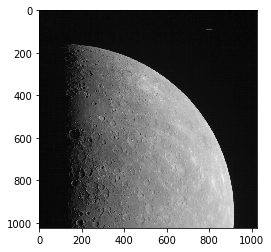

CR Artifacts : 


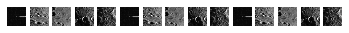

1
INFO: Iteration 1: Found 299 cosmic-ray pixels, Total: 299 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 299 [lacosmic.lacosmic]
Image : EW0215651174C.png


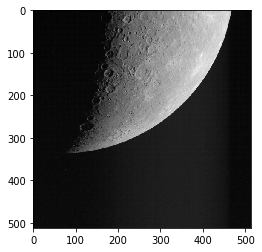

CR Artifacts : 


1
INFO: Iteration 1: Found 3051 cosmic-ray pixels, Total: 3051 [lacosmic.lacosmic]
INFO: Iteration 2: Found 57 cosmic-ray pixels, Total: 3108 [lacosmic.lacosmic]
INFO: Iteration 3: Found 0 cosmic-ray pixels, Total: 3108 [lacosmic.lacosmic]
Image : EN0215728629M.png


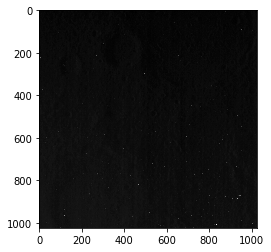

CR Artifacts : 


1
INFO: Iteration 1: Found 3078 cosmic-ray pixels, Total: 3078 [lacosmic.lacosmic]
INFO: Iteration 2: Found 39 cosmic-ray pixels, Total: 3117 [lacosmic.lacosmic]
INFO: Iteration 3: Found 0 cosmic-ray pixels, Total: 3117 [lacosmic.lacosmic]
Image : EW0215726557D.png


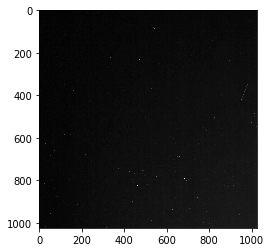

CR Artifacts : 


1
INFO: Iteration 1: Found 418 cosmic-ray pixels, Total: 418 [lacosmic.lacosmic]
INFO: Iteration 2: Found 84 cosmic-ray pixels, Total: 502 [lacosmic.lacosmic]
INFO: Iteration 3: Found 9 cosmic-ray pixels, Total: 511 [lacosmic.lacosmic]
INFO: Iteration 4: Found 0 cosmic-ray pixels, Total: 511 [lacosmic.lacosmic]
Image : EW0215844301G.png


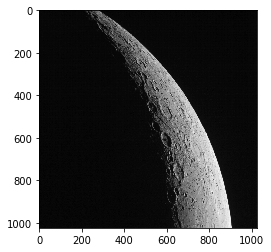

CR Artifacts : 


In [27]:
for f in yes:
    img_arr, cleanarr, crmask = identify_CRA(f)
    print("Image : " + f[f.rfind('/')+1:])
    data = rasterio.open(f)
    show(data, cmap='gray')
    print("CR Artifacts : ")
    display(img_arr, crmask, 30)

Images NOT having Cosmic Ray Artifacts
Image : EN1049375684M.png


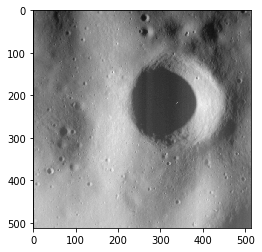

In [29]:
print("Images NOT having Cosmic Ray Artifacts")
for f in no:
    print("Image : " + f[f.rfind('/')+1:])
    data = rasterio.open(f)
    show(data, cmap='gray')

## Step 3 - Machine Learning Model

In [158]:
from tensorflow.keras import layers
from tensorflow.keras import Model

We will use the **Inception V3** model developed at Google, and pre-trained on ImageNet.

In [34]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-03-09 19:03:46--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.26.208, 2404:6800:4007:809::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.26.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  3.82MB/s    in 30s     

2020-03-09 19:04:18 (2.76 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



By specifying the **include_top=False** argument, we load a network that doesn't include the classification layers at the top—ideal for feature extraction.

In [159]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [160]:
for layer in pre_trained_model.layers:
    layer.trainable = False

The layer used for feature extraction in Inception v3 is called **mixed7**

In [161]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [162]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.0001), metrics=['acc'])

In [164]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset = os.path.join(base_dir, 'dataset')
    
train_dir = os.path.join(dataset, 'train')
val_dir = os.path.join(dataset, 'validate')
    
train_present = os.path.join(train_dir, 'train_present')
train_absent = os.path.join(train_dir, 'train_absent')

val_present = os.path.join(val_dir, 'val_present')
val_absent = os.path.join(val_dir, 'val_absent')

train_present_fnames = os.listdir(train_present)
train_absent_fnames = os.listdir(train_absent)

train_datagen = ImageDataGenerator(rescale=1./255)
# Add our data-augmentation parameters to ImageDataGenerator
'''train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)'''

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=2,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='binary')

Found 420 images belonging to 2 classes.
Found 178 images belonging to 2 classes.


In [165]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/2
100/100 [==============================] - 51s 514ms/step - loss: 0.4875 - acc: 0.8450 - val_loss: 1.0980 - val_acc: 0.7600
Epoch 2/2
100/100 [==============================] - 49s 487ms/step - loss: 0.1740 - acc: 0.9400 - val_loss: 2.9053 - val_acc: 0.7000


In [166]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
    if unfreeze:
        layer.trainable = True
    if layer.name == 'mixed6':
        unfreeze = True

# As an optimizer, here we will use SGD, with a very low learning rate (0.00001)
model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['acc'])

In [167]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 50 steps, validate for 50 steps
Epoch 1/2
50/50 [==============================] - 21s 415ms/step - loss: 0.1057 - acc: 0.9500 - val_loss: 3.2360 - val_acc: 0.7000
Epoch 2/2
50/50 [==============================] - 17s 335ms/step - loss: 0.1435 - acc: 0.9600 - val_loss: 3.5580 - val_acc: 0.7000


Plotting the training and validation loss and accuracy to show it's conclusion

Text(0.5, 1.0, 'Training and validation loss')

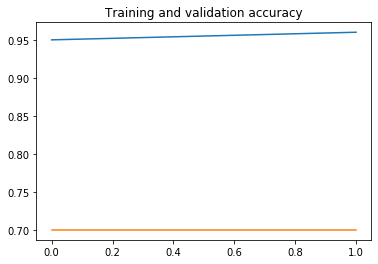

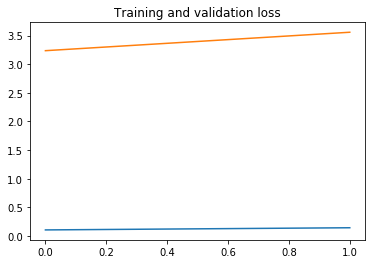

In [168]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')